In [49]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# function to load CSV file (the metrics)
def load_data(file_path):
    return pd.read_csv(file_path)


In [50]:
# loading all metrics
import os

metrics_folder = '../metrics'

circom_df = load_data(os.path.join(metrics_folder, 'metrics_for_circom.csv'))
zokrates_df = load_data(os.path.join(metrics_folder, 'metrics_for_zokrates.csv'))
noir_df = load_data(os.path.join(metrics_folder, 'metrics_for_noir.csv'))
cairo_df = load_data(os.path.join(metrics_folder, 'metrics_for_cairo.csv'))
leo_df = load_data(os.path.join(metrics_folder, 'metrics_for_leo.csv'))
risc0_df = load_data(os.path.join(metrics_folder, 'metrics_for_risc0.csv'))
sp1_zkvm_df = load_data(os.path.join(metrics_folder, 'metrics_for_sp1.csv'))
nexus_df = load_data(os.path.join(metrics_folder, 'metrics_for_nexus.csv'))
cairo_df = load_data(os.path.join(metrics_folder, 'metrics_for_cairo.csv'))
snarkvm_df = load_data(os.path.join(metrics_folder, 'metrics_for_snarkvm.csv'))
jolt_df = load_data(os.path.join(metrics_folder, 'metrics_for_jolt.csv'))


In [51]:
# preparing list of DataFrames and titles
data_frames = [circom_df, zokrates_df, noir_df, cairo_df, leo_df, risc0_df, sp1_zkvm_df, nexus_df, snarkvm_df, jolt_df]
titles = ['Circom', 'ZoKrates', 'Noir', 'Cairo', 'Leo', 'RISC Zero', 'SP1', 'Nexus VM', "snarkVM", "Jolt"]


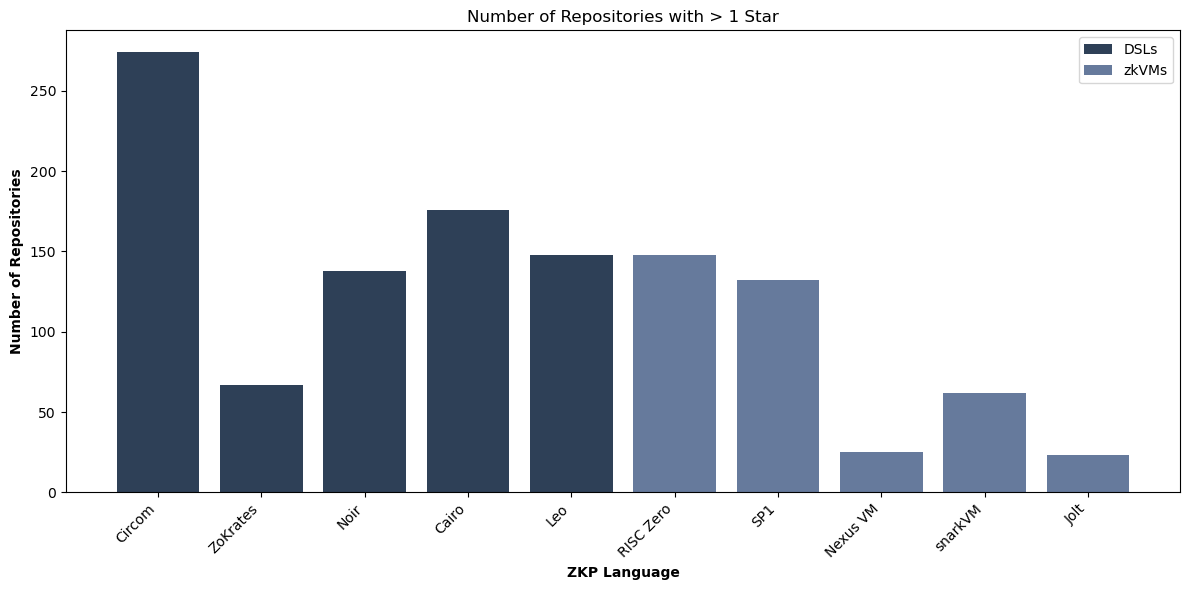

In [52]:
stars_count = [len(df[df['Stars'] > 1]) for df in data_frames]

# which languages are DSLs vs zkVMs
dsl_indices = [0, 1, 2, 3, 4]  # Circom, ZoKrates, Noir, Cairo, Leo
zkvm_indices = [5, 6, 7, 8, 9]  # RISC Zero, SP1, Nexus VM, snarkVM, Jolt

plt.figure(figsize=(12, 6))
bars = plt.bar(titles, stars_count, color=colors)

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Number of Repositories with > 1 Star')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

# saving version without title for export
plt.figure(figsize=(12, 6))
bars = plt.bar(titles, stars_count, color=colors)

# custom legend for saved version
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('../figures/more_than_1_star.png', dpi=300, bbox_inches='tight')
plt.close()

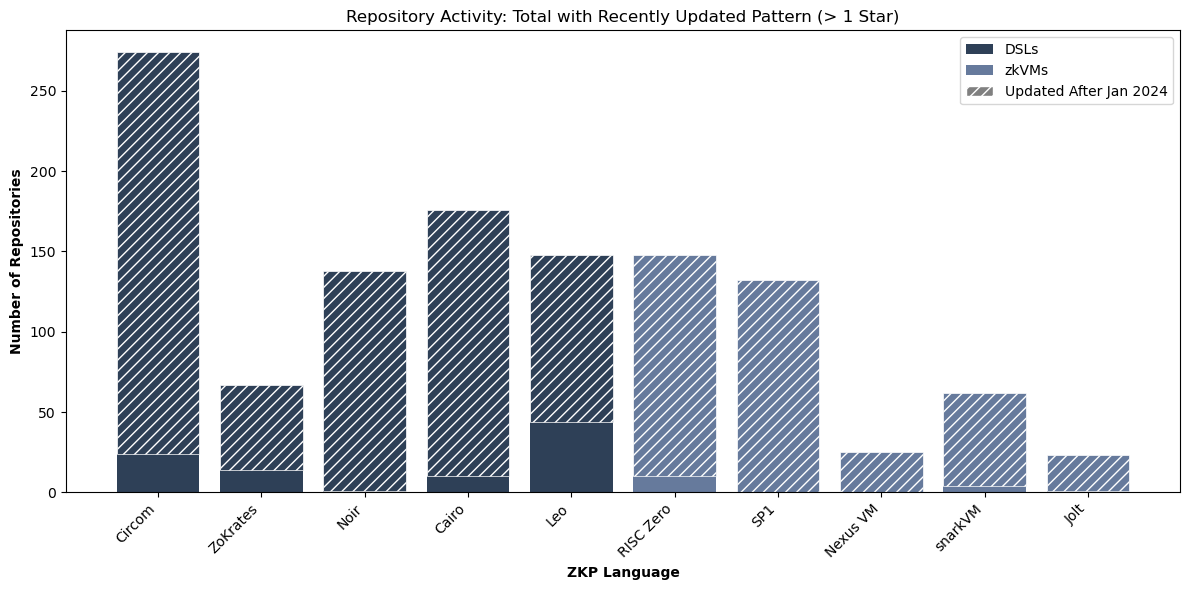

In [53]:
# combined chart: total repositories with different bar styles for recently updated (both > 1 star)
import numpy as np

stars_count = [len(df[df['Stars'] > 1]) for df in data_frames]
update_count = [len(df[(pd.to_datetime(df['Last Updated']) > pd.Timestamp('2024-01-01')) & (df['Stars'] > 1)]) for df in data_frames]
not_updated_count = [stars_count[i] - update_count[i] for i in range(len(stars_count))]

# color arrays for DSLs and zkVMs
dsl_color = '#2E4057'
zkvm_color = '#667A9C'
colors = [dsl_color if i in dsl_indices else zkvm_color for i in range(len(titles))]

plt.figure(figsize=(12, 6))

# create stacked bars: not updated (solid) + updated (with pattern)
bars1 = plt.bar(titles, not_updated_count, color=colors)
bars2 = plt.bar(titles, update_count, bottom=not_updated_count, color=colors, 
                hatch='///', edgecolor='white', linewidth=0.5)

# custom legends
from matplotlib.patches import Patch
# combined legend with both category and pattern information
legend_elements = [Patch(facecolor=dsl_color, label='DSLs'),
                  Patch(facecolor=zkvm_color, label='zkVMs'),
                  Patch(facecolor='gray', hatch='///', edgecolor='white', label='Updated After Jan 2024')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Repository Activity: Total with Recently Updated Pattern (> 1 Star)')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

# saving version without title for export
plt.figure(figsize=(12, 6))
bars1 = plt.bar(titles, not_updated_count, color=colors)
bars2 = plt.bar(titles, update_count, bottom=not_updated_count, color=colors, 
                hatch='///', edgecolor='white', linewidth=0.5)

# custom legends for saved version
legend_elements = [Patch(facecolor=dsl_color, label='DSLs'),
                  Patch(facecolor=zkvm_color, label='zkVMs'),
                  Patch(facecolor='gray', hatch='///', edgecolor='white', label='Updated After Jan 2024')]
plt.legend(handles=legend_elements, loc='upper right')

plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('../figures/total_vs_recently_updated.png', dpi=300, bbox_inches='tight')
plt.close()

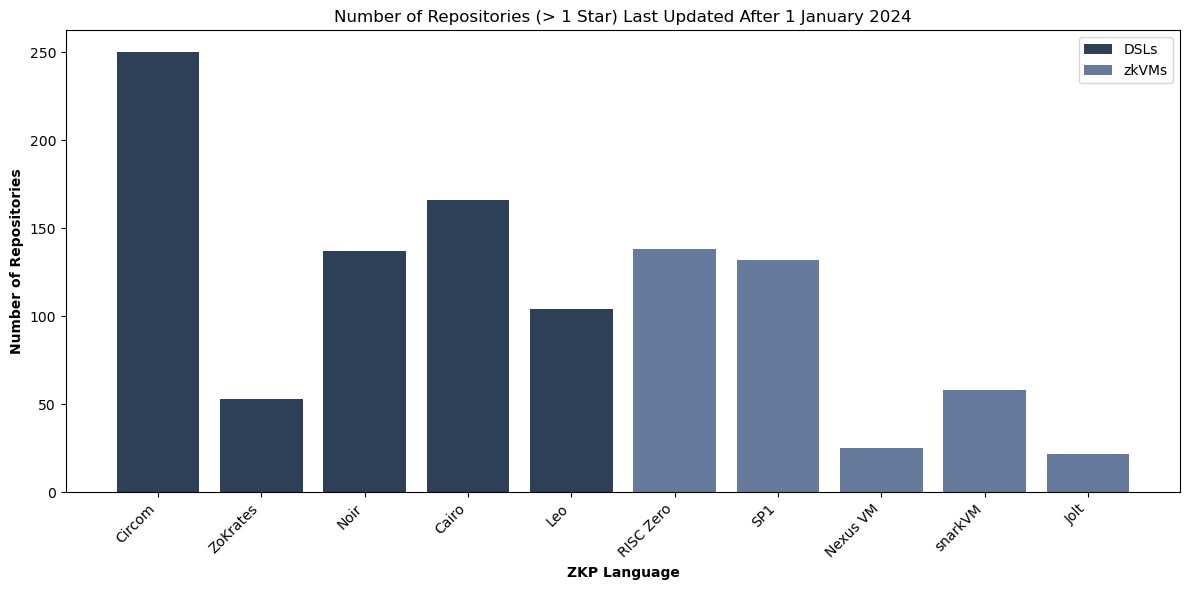

In [54]:
# number of repositories with last update time after 1 January 2024 AND > 1 star
update_count = [len(df[(pd.to_datetime(df['Last Updated']) > pd.Timestamp('2024-01-01')) & (df['Stars'] > 1)]) for df in data_frames]

plt.figure(figsize=(12, 6))
bars = plt.bar(titles, update_count, color=colors)

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Number of Repositories (> 1 Star) Last Updated After 1 January 2024')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

# saving version without title for export
plt.figure(figsize=(12, 6))
bars = plt.bar(titles, update_count, color=colors)

# custom legend for saved version
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('../figures/updated_after_2024.png', dpi=300, bbox_inches='tight')
plt.close()

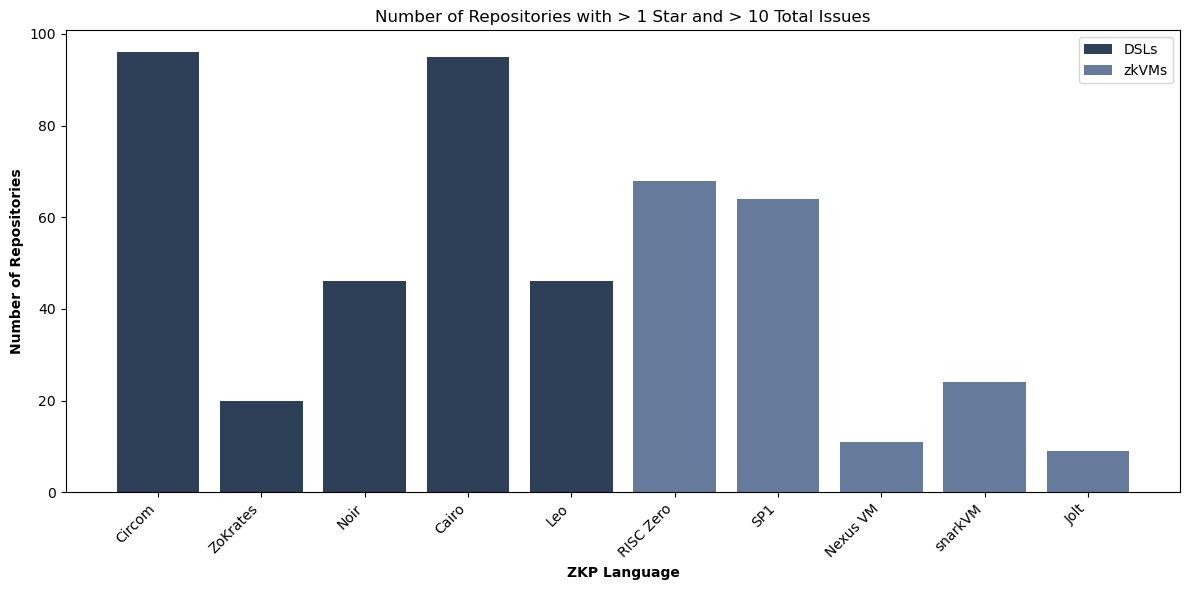

In [55]:
# number of repositories with > 10 total issues AND > 1 star
issues_count = [len(df[(df['Total Issues'] > 10) & (df['Stars'] > 1)]) for df in data_frames]

# color arrays for DSLs and zkVMs
colors = ['#2E4057' if i in dsl_indices else '#667A9C' for i in range(len(titles))]

plt.figure(figsize=(12, 6))
bars = plt.bar(titles, issues_count, color=colors)

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Number of Repositories with > 1 Star and > 10 Total Issues')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

# saving version without title for export
plt.figure(figsize=(12, 6))
bars = plt.bar(titles, issues_count, color=colors)

# custom legend for saved version
legend_elements = [Patch(facecolor='#2E4057', label='DSLs'),
                  Patch(facecolor='#667A9C', label='zkVMs')]
plt.legend(handles=legend_elements, loc='upper right')

plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('../figures/more_than_10_issues.png', dpi=300, bbox_inches='tight')
plt.close()

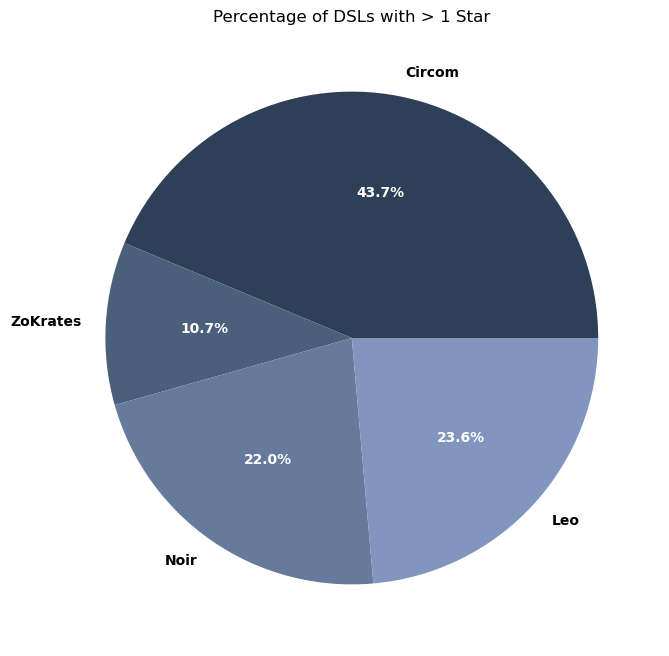

In [56]:
# percentage of Circom, ZoKrates, and Noir programs with > 1 star
circom_count = len(circom_df[circom_df['Stars'] > 1])
zokrates_count = len(zokrates_df[zokrates_df['Stars'] > 1])
noir_count = len(noir_df[noir_df['Stars'] > 1])
leo_count = len(leo_df[leo_df['Stars'] > 1])

total_programs = circom_count + zokrates_count + noir_count + leo_count
percentages = [
    circom_count / total_programs * 100,
    zokrates_count / total_programs * 100,
    noir_count / total_programs * 100,
    leo_count / total_programs * 100
]

# color palette using shades of the same blue
colors = ['#2E4057', '#4A5F7A', '#667A9C', '#8295BF']
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentages, labels=['Circom', 'ZoKrates', 'Noir', 'Leo'], autopct='%1.1f%%', colors=colors)
# setting label colors to black and percentage colors to white
for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.title('Percentage of DSLs with > 1 Star')
plt.show()

# saving version without title for export
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentages, labels=['Circom', 'ZoKrates', 'Noir', 'Leo'], autopct='%1.1f%%', colors=colors)
# setting label colors to black and percentage colors to white
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.savefig('../figures/DSL_percentages.png', dpi=300, bbox_inches='tight')
plt.close()

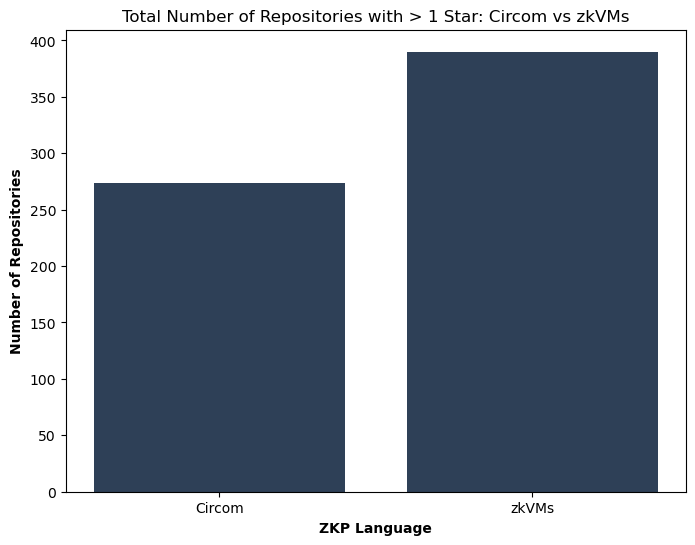

In [57]:
# total number of repositories with > 1 star: Circom vs zkVMs
zkvm_count = (len(risc0_df[risc0_df['Stars'] > 1]) + 
              len(sp1_zkvm_df[sp1_zkvm_df['Stars'] > 1]) + 
              len(nexus_df[nexus_df['Stars'] > 1]) + 
              len(snarkvm_df[snarkvm_df['Stars'] > 1]) + 
              len(jolt_df[jolt_df['Stars'] > 1]))
total_repositories = [circom_count, zkvm_count]
plt.figure(figsize=(8, 6))
plt.bar(['Circom', 'zkVMs'], total_repositories, color='#2E4057')  
plt.title('Total Number of Repositories with > 1 Star: Circom vs zkVMs')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.show()

# saving version without title for export
plt.figure(figsize=(8, 6))
plt.bar(['Circom', 'zkVMs'], total_repositories, color='#2E4057')
plt.ylabel('Number of Repositories', fontweight='bold')
plt.xlabel('ZKP Language', fontweight='bold')
plt.savefig('../figures/Circom_vs_zkVMs.png', dpi=300, bbox_inches='tight')
plt.close()